In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data:
- Monthly HES data for Circulatory and Respiratory disease for LSOA's
- MAIAC mean monthly PM2.5 estimates for LSOA's

## Merge the data based on year, month and LSOA

In [3]:
Circulatory_monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_all.csv')

In [4]:
Circulatory_monthly = Circulatory_monthly[['Disease', 'year', 'month', 'n', 'DSR', 'lcl', 'ucl', 'score', 'rank', 'decile', 'lsoa11']]

In [5]:
Respiratory_monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_all.csv')

In [6]:
Respiratory_monthly = Respiratory_monthly[['Disease', 'year', 'month', 'n', 'DSR', 'lcl', 'ucl', 'score', 'rank', 'decile', 'lsoa11']]

In [7]:
AP_Monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\Monthly_PM25_LSOA.csv')

In [8]:
AP_Monthly = AP_Monthly.rename(columns={'LSOA':'lsoa11', 'value':'PM25'})

In [9]:
AP_Monthly = AP_Monthly[['time', 'lsoa11', 'PM25', 'month', 'year']].dropna()

In [10]:
Circ_AP = pd.merge(Circulatory_monthly, AP_Monthly, on=['year', 'month','lsoa11'], how='inner')

In [11]:
Resp_AP = pd.merge(Respiratory_monthly, AP_Monthly, on=['year', 'month','lsoa11'], how='inner')

In [12]:
Circ_AP[:5]

,Disease,year,month,n,DSR,lcl,ucl,score,rank,decile,lsoa11,time,PM25
0,All Circulatory,2009,1,NaN,69.247604,8.247776,250.557617,11.430000,22492,7,E01015272,2009-01-31,11.609479
1,All Circulatory,2009,1,NaN,147.841522,3.743035,823.720154,33.619999,6665,3,E01015273,2009-01-31,11.410336
2,All Circulatory,2009,1,NaN,187.446503,38.159660,549.000244,20.290001,13991,5,E01015274,2009-01-31,11.650494
3,All Circulatory,2009,1,NaN,309.000488,59.781487,912.577209,19.780001,14447,5,E01015275,2009-01-31,11.682238
4,All Circulatory,2009,1,NaN,162.742996,15.881656,599.259460,26.400000,10063,4,E01015276,2009-01-31,11.347145


## Stratify Deprivation Score

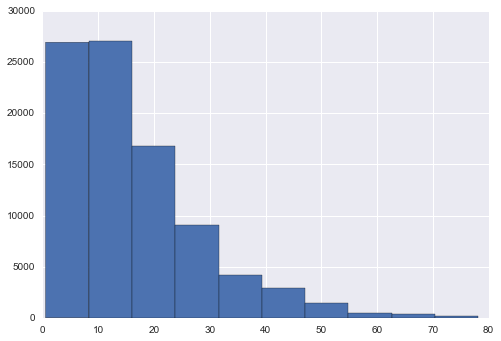

In [13]:
Circ_AP.score.hist()

In [15]:
Circ_AP.score.describe()

count    89376.000000
mean        16.190630
std         12.050107
min          0.580000
25%          7.250000
50%         13.090000
75%         21.770000
max         78.129997
Name: score, dtype: float64

In [26]:
Circ_AP['Depr_cat'] = pd.cut(Circ_AP.score, [0,7,13,22,100])

In [27]:
Circ_AP[:5]

,Disease,year,month,n,DSR,lcl,ucl,score,rank,decile,lsoa11,time,PM25,Depr_cat
0,All Circulatory,2009,1,NaN,69.247604,8.247776,250.557617,11.430000,22492,7,E01015272,2009-01-31,11.609479,"(7, 13]"
1,All Circulatory,2009,1,NaN,147.841522,3.743035,823.720154,33.619999,6665,3,E01015273,2009-01-31,11.410336,"(22, 100]"
2,All Circulatory,2009,1,NaN,187.446503,38.159660,549.000244,20.290001,13991,5,E01015274,2009-01-31,11.650494,"(13, 22]"
3,All Circulatory,2009,1,NaN,309.000488,59.781487,912.577209,19.780001,14447,5,E01015275,2009-01-31,11.682238,"(13, 22]"
4,All Circulatory,2009,1,NaN,162.742996,15.881656,599.259460,26.400000,10063,4,E01015276,2009-01-31,11.347145,"(22, 100]"


In [28]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=df).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [29]:
res = Circ_AP.groupby('Depr_cat').apply(do_regression)

In [25]:
res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 13]",172.289236,-0.044078,0.000002
"(13, 100]",201.685900,-0.184737,0.000035


In [30]:
res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 7]",170.514203,-0.176952,0.000031
"(7, 13]",174.055465,0.070313,0.000006
"(13, 22]",186.093568,0.030159,0.000001
"(22, 100]",219.744285,-0.518822,0.000230


In [31]:
Resp_AP.score.describe()

count    87048.000000
mean        16.950851
std         12.480907
min          0.580000
25%          7.580000
50%         13.710000
75%         22.910000
max         78.129997
Name: score, dtype: float64

In [38]:
Resp_AP['Depr_cat'] = pd.cut(Resp_AP.score, [0,14,80])

In [39]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=df).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [40]:
resp_res = Resp_AP.groupby('Depr_cat').apply(do_regression)

In [29]:
resp_res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 70]",185.49779,-1.82106,0.003705
"(70, 80]",185.49779,-1.82106,0.003705


In [35]:
resp_res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 7]",157.790513,-1.893149,0.004688
"(7, 14]",164.667974,-1.561485,0.003683
"(14, 23]",186.798074,-2.036577,0.005914
"(23, 80]",249.334762,-3.074460,0.007066


In [41]:
resp_res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 14]",161.363554,-1.686957,0.004013
"(14, 80]",217.336830,-2.479519,0.005870


## Yearly

In [42]:
Circ_Yearly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_all.csv')

In [43]:
Resp_Yearly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_all.csv')

In [44]:
AP_Yearly = pd.read_csv('D:\Annies_Dissertation\Analysis\Regression\Yearly_PM25_LSOA.csv')

In [45]:
AP_Yearly = AP_Yearly.rename(columns={'LSOA':'lsoa11', 'value':'PM25'})

In [46]:
AP_Yearly = AP_Yearly[['time', 'lsoa11', 'PM25', 'year']].dropna()

In [47]:
Circul_AP_Y = pd.merge(Circ_Yearly, AP_Yearly, on=['year','lsoa11'], how='inner')

In [48]:
Respir_AP_Y = pd.merge(Resp_Yearly, AP_Yearly, on=['year','lsoa11'], how='inner')

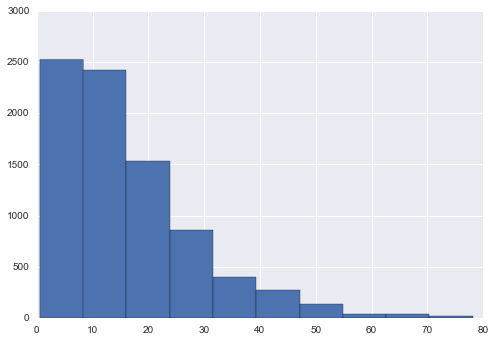

In [49]:
Circul_AP_Y.score.hist()

In [50]:
Circul_AP_Y.score.describe()

count    8229.000000
mean       16.217644
std        12.128710
min         0.580000
25%         7.150000
50%        13.080000
75%        21.969999
max        78.129997
Name: score, dtype: float64

In [51]:
Circul_AP_Y['Depr_cat'] = pd.cut(Circul_AP_Y.score,[0, 13,80])

In [55]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=df).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [56]:
res = Circul_AP_Y.groupby('Depr_cat').apply(do_regression)

In [57]:
res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 13]",1399.882667,23.077880,0.004476
"(13, 80]",1858.004284,8.692204,0.000589


In [58]:
Respir_AP_Y.score.describe()

count    8230.000000
mean       16.219216
std        12.128813
min         0.580000
25%         7.150000
50%        13.080000
75%        21.969999
max        78.129997
Name: score, dtype: float64

In [59]:
Respir_AP_Y['Depr_cat'] = pd.cut(Respir_AP_Y.score, [0,13,80])

In [60]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=df).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [61]:
res = Respir_AP_Y.groupby('Depr_cat').apply(do_regression)

In [62]:
res

,Intercept,PM25,r2
Depr_cat,,,
"(0, 13]",1267.928994,0.400796,0.000002
"(13, 80]",2008.823418,-12.681800,0.000930


## Stratify by PM2.5

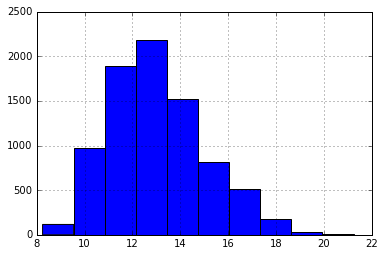

In [46]:
Circul_AP_Y.PM25.hist()

In [47]:
Circul_AP_Y['PM25_cat'] = pd.cut(Circul_AP_Y.PM25, [0,20,22])

In [48]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Circul_AP_Y).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [53]:
res = Circul_AP_Y.groupby('PM25_cat').apply(do_regression)

In [54]:
res

,Intercept,PM25,r2
PM25_cat,,,
"(0, 20]",1520.132096,24.154825,0.004599
"(20, 22]",1520.132096,24.154825,0.004599


In [50]:
Respir_AP_Y['PM25_cat'] = pd.cut(Respir_AP_Y.PM25, [0,12,16,22])

In [51]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Respir_AP_Y).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [52]:
res = Respir_AP_Y.groupby('PM25_cat').apply(do_regression)

In [53]:
res

,Intercept,PM25,r2
PM25_cat,,,
"(0, 12]",1404.586836,11.800434,0.000908
"(12, 16]",1404.586836,11.800434,0.000908
"(16, 22]",1404.586836,11.800434,0.000908
